In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:

train_data = pd.read_csv('train.csv', index_col = 0)
X_all = train_data.loc[: , 'MSSubClass':'SaleCondition']
y = np.array(train_data['SalePrice'])
y1 = np.log(y).reshape((1460,1))
Y_all = pd.DataFrame(y1, columns=['log_SalePrice'])

X_exam = pd.read_csv('test.csv', index_col = 0)

#X_all.head()
#X_all.info()
X_exam




,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml


In [ ]:
def split_train_exam(X_combined, n):
    X_task = X_combined.iloc[:n,:]
    X_exam = X_combined.iloc[n:,:]
    return X_task, X_exam

In [ ]:
X_combined = pd.concat([X_all, X_exam], axis = 0)
X_combined = X_combined.dropna(axis = 1)
X_combined = pd.get_dummies(X_combined)
X_combined

X_task, X_exam = split_train_exam(X_combined, 1460)







In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score

# function to compute R^2 & RMSE and print them
# prefix : string to be printed at the front of a line
def model_perf(model, X, Y, prefix=''):
    Yhat = model.predict(X)
    r2 = r2_score(Y, Yhat)
    rmse = mean_squared_error(Y, Yhat, squared=False)
    print (f'{prefix} R^2 score = {r2:.3f}, RMSE = {rmse:.4f}')

    
def model_fit_perf(model, X_all, Y_all, prefix=''):
    X_trn, X_val, Y_trn, Y_val = train_test_split(X_all, Y_all, test_size=0.2, random_state=4)
    model.fit(X_trn, Y_trn)
    model_perf(model, X_trn, Y_trn, f'{prefix} Training  ')
    model_perf(model, X_val, Y_val, f'{prefix} Validation')
    s = cross_val_score(model, X_all, Y_all, cv=10)
    print (f'{prefix} Cross val. R^2 score mean = {s.mean():.3f}, std = {s.std():.3f}')

In [ ]:
model = LinearRegression()
model_fit_perf(model, X_task, Y_all, prefix='LinearRegression')





LinearRegression Training   R^2 score = 0.916, RMSE = 0.1175
LinearRegression Validation R^2 score = 0.856, RMSE = 0.1438
LinearRegression Cross val. R^2 score mean = 0.844, std = 0.078


In [ ]:
Yhat_val = model.predict(X_exam)
SalePrice_pdt = np.exp(Yhat_val)
mysub = pd.DataFrame(SalePrice_pdt, columns =['SalePrice'])
sample_submit = pd.read_csv('sample_submission.csv')
sample_submit['SalePrice'] = mysub['SalePrice']
sample_submit.to_csv('mysub.csv', index = False)






In [ ]:
# this function keep columns with missing values less than na_ratio
def keep_columns(X_combined, na_ratio=0):
    X_null = X_combined.isnull().sum(axis=0)
    max_na = X_combined.shape[0] * na_ratio
    col = [c for c in X_combined.columns if X_null[c] <= max_na]
    return X_combined[col]

In [ ]:
X_combined = pd.concat([X_all, X_exam], axis = 0)
X_combined = keep_columns(X_combined, na_ratio=0.2)
X_combined.info()








<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   LotShape       2919 non-null   object 
 6   LandContour    2919 non-null   object 
 7   Utilities      2917 non-null   object 
 8   LotConfig      2919 non-null   object 
 9   LandSlope      2919 non-null   object 
 10  Neighborhood   2919 non-null   object 
 11  Condition1     2919 non-null   object 
 12  Condition2     2919 non-null   object 
 13  BldgType       2919 non-null   object 
 14  HouseStyle     2919 non-null   object 
 15  OverallQual    2919 non-null   int64  
 16  OverallCond    2919 non-null   int64  
 17  YearBuilt      2919 non-null   int64  
 18  YearRemo

In [ ]:
num_cols = X_combined.select_dtypes(include = np.number).columns
cat_cols = X_combined.select_dtypes(include = 'object').columns

print(X_combined)







      MSSubClass MSZoning  LotFrontage  ...  YrSold SaleType SaleCondition
Id                                      ...                               
1             60       RL         65.0  ...    2008       WD        Normal
2             20       RL         80.0  ...    2007       WD        Normal
3             60       RL         68.0  ...    2008       WD        Normal
4             70       RL         60.0  ...    2006       WD       Abnorml
5             60       RL         84.0  ...    2008       WD        Normal
...          ...      ...          ...  ...     ...      ...           ...
2915         160       RM         21.0  ...    2006       WD        Normal
2916         160       RM         21.0  ...    2006       WD       Abnorml
2917          20       RL        160.0  ...    2006       WD       Abnorml
2918          85       RL         62.0  ...    2006       WD        Normal
2919          60       RL         74.0  ...    2006       WD        Normal

[2919 rows x 74 columns]

In [ ]:
# Task 2-3 : make imputers and apply 
from sklearn.impute import SimpleImputer
num_imputer = SimpleImputer(missing_values = np.nan, strategy='mean')
cat_imputer = SimpleImputer(missing_values = np.nan, strategy='most_frequent')
X_combined[num_cols] = num_imputer.fit_transform(X_combined[num_cols])
X_combined[cat_cols] = cat_imputer.fit_transform(X_combined[cat_cols])










In [ ]:
def split_train_exam(X_combined, n):
    X_task2 = X_combined.iloc[:n,:]
    X_exam2 = X_combined.iloc[n:,:]
    return X_task2, X_exam2



In [ ]:
X_combined = pd.get_dummies(X_combined)

X_task2, X_exam2 = split_train_exam(X_combined, 1460)




In [ ]:
model = LinearRegression()
model_fit_perf(model, X_task2, Y_all, prefix='LinearRegression')




LinearRegression Training   R^2 score = 0.947, RMSE = 0.0927
LinearRegression Validation R^2 score = -101134333.143, RMSE = 3810.1067
LinearRegression Cross val. R^2 score mean = -93662860.527, std = 271329431.087


In [ ]:
# Task 3-1 : Lasso model fitting and check performance
from sklearn.linear_model import Lasso, Ridge, ElasticNet

model = Lasso(alpha=1.0)
model_fit_perf(model, X_task, Y_all, prefix='Lasso')

coefficients = model.coef_
zeros = np.count_nonzero(coefficients == 0)
non_zeros = coefficients.size - zeros
print("# of zero coefficients=", zeros, ', # of non-zeros=', non_zeros)







Lasso Training   R^2 score = 0.732, RMSE = 0.2091
Lasso Validation R^2 score = 0.792, RMSE = 0.1730
Lasso Cross val. R^2 score mean = 0.724, std = 0.122
# of zero coefficients= 140 , # of non-zeros= 9


In [ ]:
# Task 3-2 : Ridge model fitting and check performance
model = Ridge(alpha=1.0)
model_fit_perf(model, X_task, Y_all, prefix='Ridge')

coefficients = model.coef_
zeros = np.count_nonzero(coefficients == 0)
non_zeros = coefficients.size - zeros
print("# of zero coefficients=", zeros, ', # of non-zeros=', non_zeros)






Ridge Training   R^2 score = 0.908, RMSE = 0.1225
Ridge Validation R^2 score = 0.881, RMSE = 0.1307
Ridge Cross val. R^2 score mean = 0.858, std = 0.071
# of zero coefficients= 2 , # of non-zeros= 147


In [ ]:
# Task 3-3 : ElasticNet model fitting and check performance
model = ElasticNet(alpha=1.0)
model_fit_perf(model, X_task, Y_all, prefix='ElasticNet')

coefficients = model.coef_
zeros = np.count_nonzero(coefficients == 0)
non_zeros = coefficients.size - zeros
print("# of zero coefficients=", zeros, ', # of non-zeros=', non_zeros)







ElasticNet Training   R^2 score = 0.753, RMSE = 0.2010
ElasticNet Validation R^2 score = 0.806, RMSE = 0.1669
ElasticNet Cross val. R^2 score mean = 0.743, std = 0.117
# of zero coefficients= 138 , # of non-zeros= 11


In [ ]:
# Task 4-1 : correlation analysis
XY_all = pd.read_csv('train.csv', index_col= 0)
Corr_XY = XY_all.corr()

Corr_saleprice = XY_all.corr().iloc[:,-1]


Sorted = Corr_saleprice.sort_values(kind="quicksort", ascending= False)
print('correlation with saleprice\n', Sorted)

Sorted1 = Sorted.to_frame()
high_corr_cols = Sorted1.iloc[0:6, ]
index = high_corr_cols.index
print('Top 6 Features\n',index)














correlation with saleprice
 SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: Sale

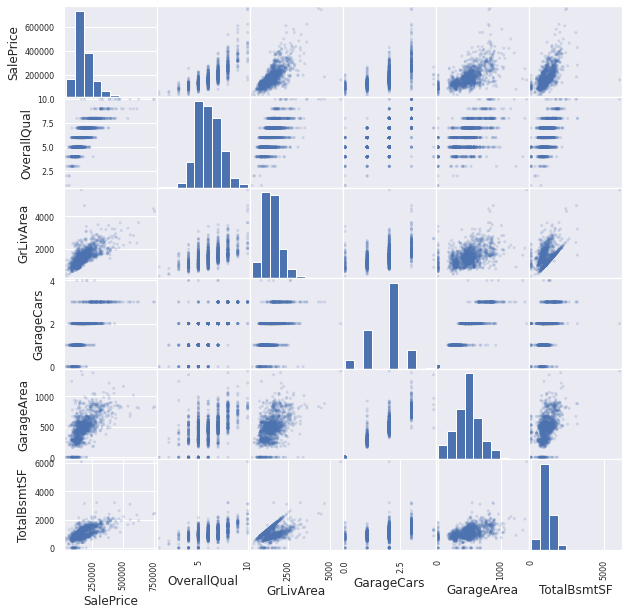

In [ ]:
from pandas.plotting import scatter_matrix
# Task 4-2 : scatter matrix
XY_all = XY_all[list(index)]
scatter_matrix(XY_all, alpha=0.2, figsize=(10, 10));



In [ ]:
# Task 5-1 : interaction feature







In [ ]:
# Task 5-2. fill in this code cell 
from sklearn.model_selection import GridSearchCV
model = Ridge()

param_grid = {'alpha': np.linspace(0, 20, 41)}

ridge = GridSearchCV(model, param_grid, scoring = 'neg_mean_squared_error', cv =5)
ridge.fit(X_task, Y_all)
print(ridge.best_params_)












{'alpha': 8.5}


In [ ]:
model = Ridge(alpha=8.5)
model_fit_perf(model, X_task, Y_all, prefix='Ridge')

Ridge Training   R^2 score = 0.893, RMSE = 0.1320
Ridge Validation R^2 score = 0.889, RMSE = 0.1260
Ridge Cross val. R^2 score mean = 0.862, std = 0.070


In [260]:
Yhat_val = model.predict(X_exam)
SalePrice_pdt = np.exp(Yhat_val)
mysub = pd.DataFrame(SalePrice_pdt, columns =['SalePrice'])
sample_submit = pd.read_csv('sample_submission.csv')
sample_submit['SalePrice'] = mysub['SalePrice']
sample_submit.to_csv('mysub2.csv', index = False)